In [1]:
def tim(data):    
    import pandas as pd
    import matplotlib.pyplot as plt

    a,b = data.columns[0],data.columns[1]
    data[a] = pd.to_datetime(data[a])
    data.set_index(a, inplace=True)

    window_size = 3
    moving_average = data[b].rolling(window=window_size).mean()
    cumulative_moving_average = data[b].expanding().mean()
    # Plot original time series
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[b], label='Original Time Series')

    # Plot moving average
    plt.plot(data.index, moving_average, label=f'{window_size}-Year Moving Average', color='red')
    plt.plot(data.index, cumulative_moving_average, label='Cumulative Moving Average', color='purple')

    plt.title('Time Series Analysis (USA)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"graph_{b}.png")
    


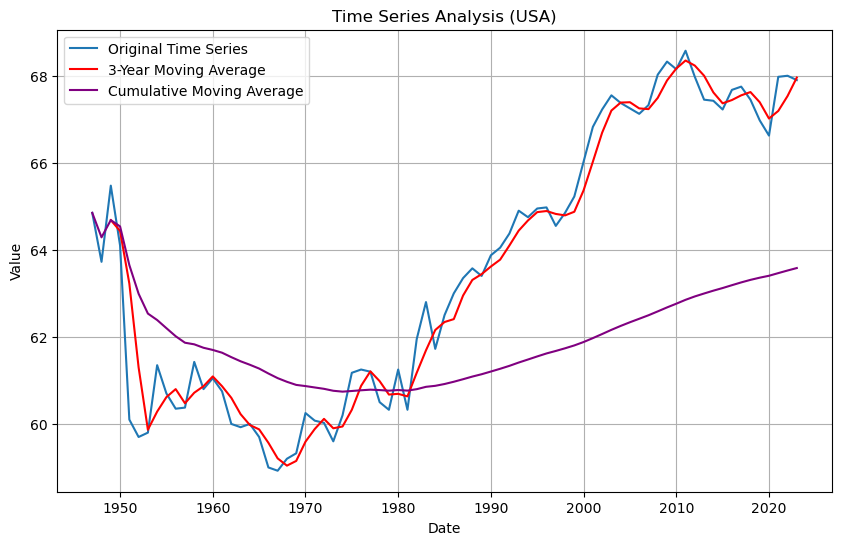

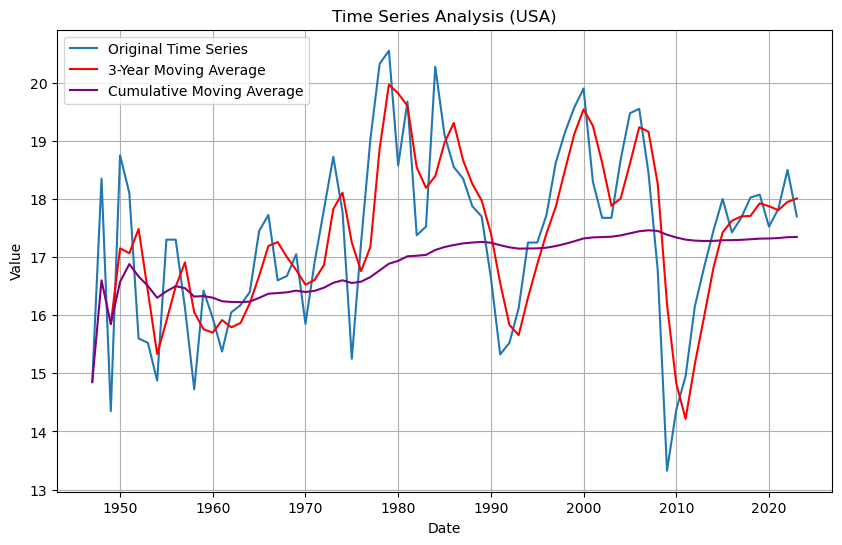

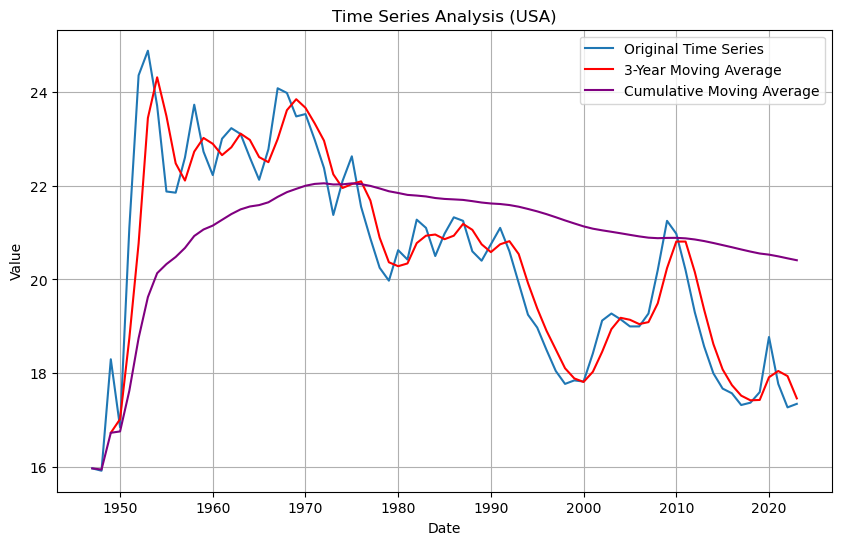

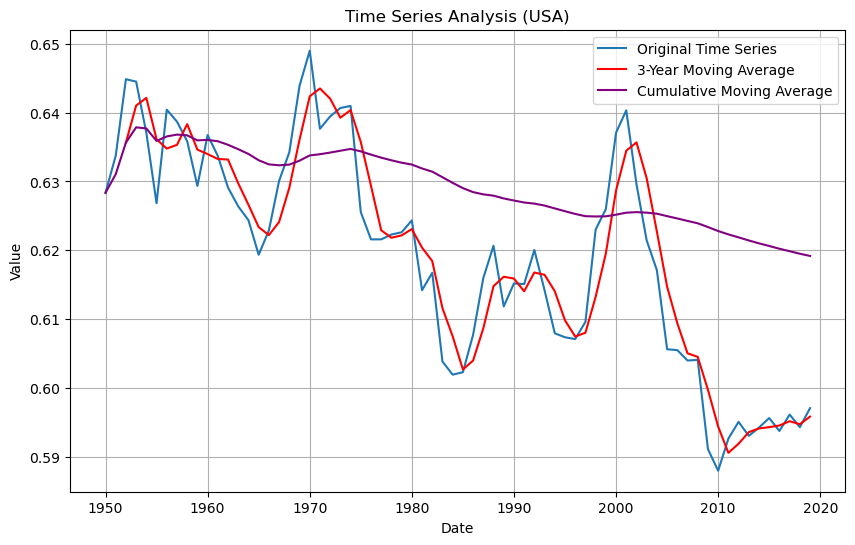

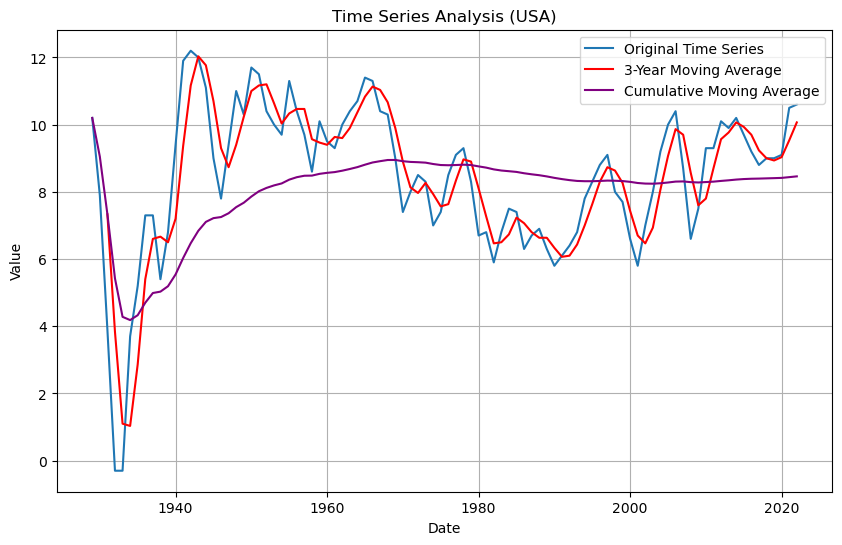

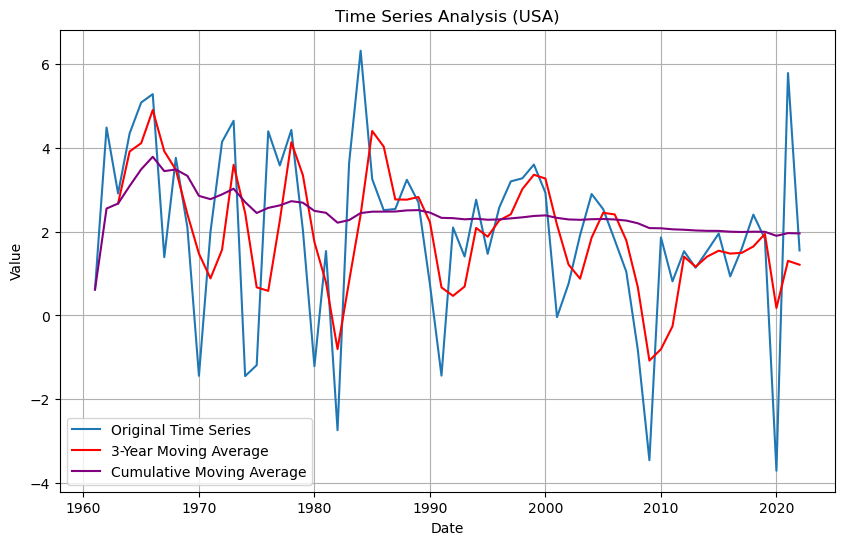

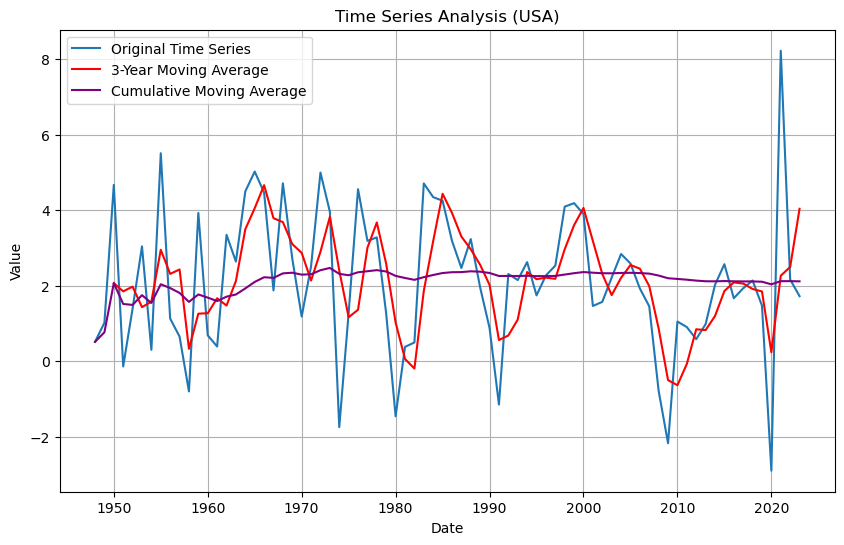

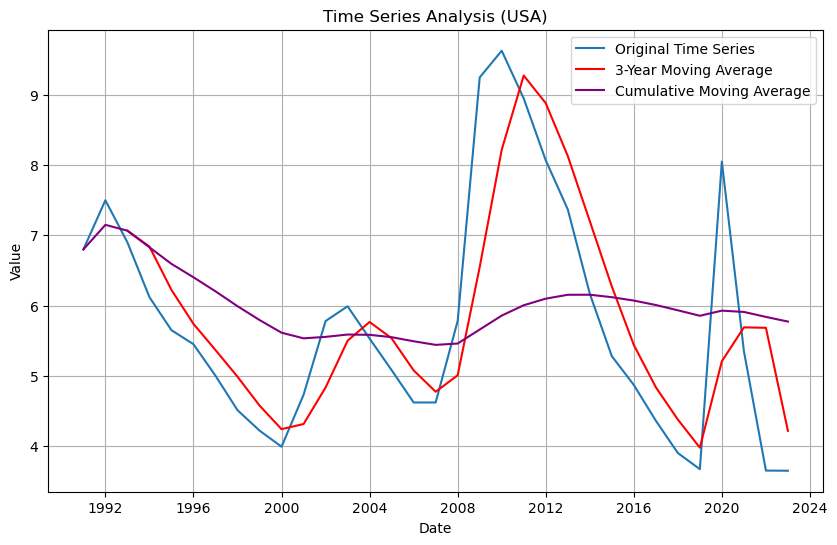

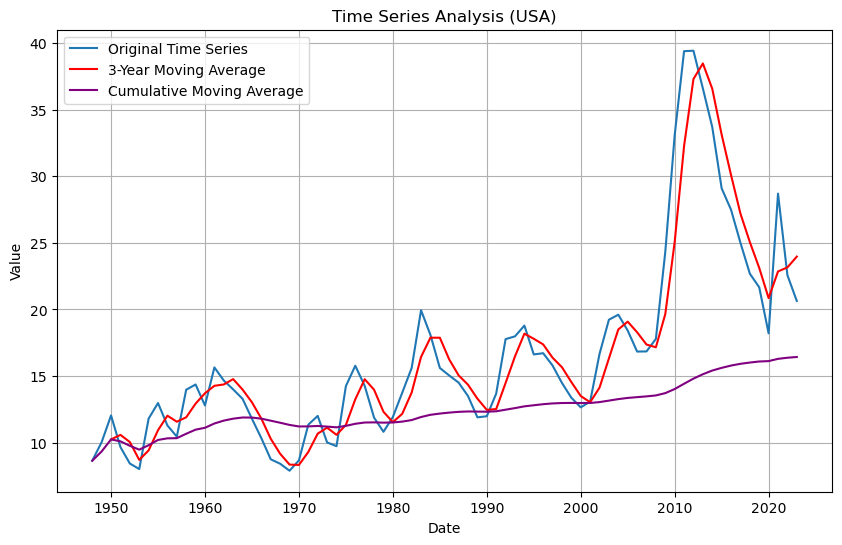

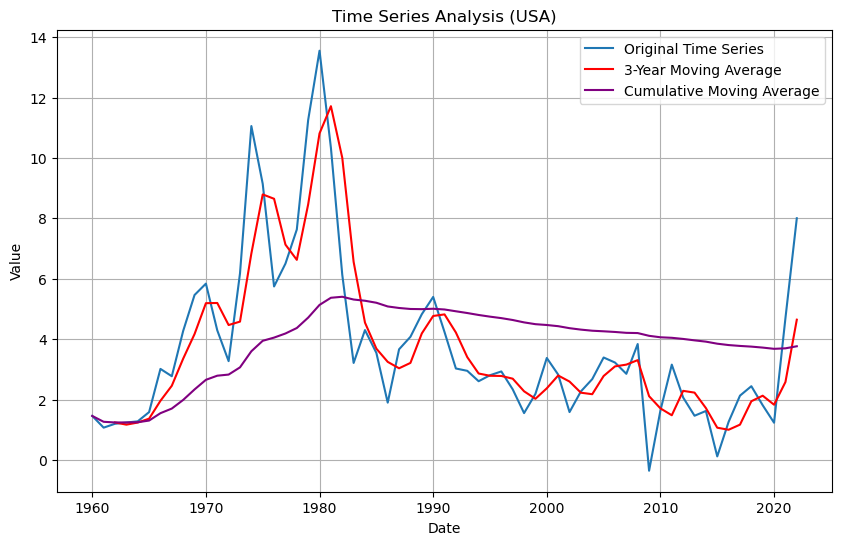

In [2]:
import pandas as pd

for i in range(1,11):
    data = pd.read_csv(f'us{i}.csv')
    tim(data)

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

for i in range(1,11):
    # Load the data
    dte=f'Date{i}'
    dta=f'Data{i}'
    df = pd.read_csv(f'us{i}.csv', parse_dates=[dte], dayfirst=True, index_col=dte)

    # Perform the ADF test
    result = adfuller(df[dta])

    # Extract and print test results
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Check for stationarity based on p-value
    if result[1] < 0.01:
        print(f"Result_{i}: The time series is likely stationary (reject null hypothesis)")
    else:
        print(f"Result_{i}: The time series is likely non-stationary (fail to reject null hypothesis)")
    print(f"Avg: {df[dta].mean()}")
    print(f"___________________________________________________________________________________________________________")

ADF Statistic: -0.4156503628862946
p-value: 0.9074527510385244
Critical Values:
   1%: -3.5335601309235605
   5%: -2.9064436883991434
   10%: -2.590723948576676
Result_1: The time series is likely non-stationary (fail to reject null hypothesis)
Avg: 63.58181818181819
___________________________________________________________________________________________________________
ADF Statistic: -3.607989107899475
p-value: 0.005610117203564969
Critical Values:
   1%: -3.520713130074074
   5%: -2.9009249540740742
   10%: -2.5877813777777776
Result_2: The time series is likely stationary (reject null hypothesis)
Avg: 17.347077922077922
___________________________________________________________________________________________________________
ADF Statistic: -2.000224418039802
p-value: 0.2864747083484765
Critical Values:
   1%: -3.5219803175527606
   5%: -2.9014701097664504
   10%: -2.58807215485756
Result_3: The time series is likely non-stationary (fail to reject null hypothesis)
Avg: 20.4103896